# SCIENCEHack baseline

**Бейзлайн (от анг. baseline - базовая линия)** - основная простая модель, которая может служить ориентиром для дальнейшей работы и оценки качества. На хакатонах такие модели обычно служат отправной точкой для написания своего хода.

Также бейзлайны позволяют понять, как итоговый выход должна давать модель. Например, в нашем случае это файл.

Сначала выполним импорт всех необходимых библиотек.

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas import Series
import pandas.core.algorithms as algos
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv

import re
import traceback
import string
import warnings
warnings.filterwarnings('ignore')

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# метрики для задачи классификации
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# модели
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

plt.style.use('fivethirtyeight')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'black'
plt.rcParams['ytick.labelcolor'] = 'black'
%matplotlib inline

# Предобработка данных

Здесь мы открываем файлы из папки data: данные для обучения модели и для итогового результата.

In [2]:
model = pd.read_excel('For_model_labled.xlsx')
check = pd.read_excel('For_check_unlabled.xlsx')

Проверяем, что всё загрузилось корректно и выводим первые 10 строк.

In [3]:
model.head(10)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
0,148029,410503113,24.08500,-4.591070,20.110600,12.43260,20.62800,0.571144,1.795240,-1,2.57188,-2.15672,-1.30836,0.501343,2.52255,0.197459,-2.596300,12.0101,1
1,148031,147290061,22.94630,-4.677580,5.187980,-21.85720,6.98534,-1.858470,2.304500,1,67.16120,-8.24769,11.37090,-65.675800,14.04710,-2.246710,2.198320,4.0102,1
2,148029,86810610,2.39342,0.346488,-1.935140,1.36514,1.96592,0.648077,-1.393620,1,33.86190,-30.87370,-8.12102,11.291100,31.92390,0.346700,-2.884380,11.0103,1
3,149181,1298157807,80.32260,-14.435900,26.110100,74.57610,29.83510,1.647090,2.075850,1,22.38180,2.30876,7.14518,21.084600,7.50892,1.755900,1.258260,12.0104,-1
4,147754,125401937,3.20864,2.846250,-0.351847,-1.43891,2.86791,-0.482756,-0.122994,1,27.96590,-4.05881,-9.86542,-25.851300,10.66770,-1.618370,-1.961110,11.0105,1
5,147926,99904422,41.64820,5.183480,13.702700,-38.98640,14.65030,-1.705460,1.209150,-1,18.74460,3.68767,-1.74025,-18.295700,4.07767,-2.206480,-0.440924,12.0105,-1
6,146644,64560473,8.38548,-1.326310,4.927850,-6.65384,5.10321,-1.080800,1.833710,1,26.07540,-8.25896,12.11040,-21.565100,14.65850,-1.178660,2.169320,3.0106,-1
7,147115,169422614,4.46005,-0.447907,-2.382210,-3.74386,2.42395,-1.219210,-1.756650,-1,20.30900,5.82525,11.26110,-15.865400,12.67860,-1.048440,1.093410,11.0106,-1
8,149181,237581537,30.63640,11.500500,25.547800,-12.39500,28.01700,-0.429119,1.147810,1,2.37504,1.60070,1.57220,-0.778947,2.24367,-0.340554,0.776418,3.0108,-1
9,147926,470046968,72.49660,11.825200,-6.271380,-71.25010,13.38530,-2.373900,-0.487623,1,19.38140,-1.61494,-5.60525,-18.482800,5.83326,-1.870430,-1.851310,12.0109,-1


In [4]:
check.head(10)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M
0,148029,100003381,65.06780,5.37255,13.700600,63.381800,14.71640,2.166580,1.197080,-1,29.0169,4.54971,3.45453,28.4490,5.71258,2.30852,0.649418,5.12717
1,148031,100042391,3.12536,2.22344,2.006790,-0.892737,2.99514,-0.293816,0.734227,-1,116.8820,6.82027,-21.85020,114.6190,22.88990,2.31389,-1.268240,31.50580
2,146511,100064781,71.24670,11.72080,4.581750,70.126500,12.58450,2.418930,0.372643,-1,66.1437,-12.58850,-4.71148,64.7636,13.44130,2.27616,-2.783460,26.07740
3,149181,100065292,95.40600,9.38112,-35.117300,-88.210400,36.34870,-1.619690,-1.309760,1,18.6863,1.74850,-3.03126,18.3557,3.49940,2.35946,-1.047590,80.98260
4,149181,1000680111,47.24090,-18.94710,-12.786300,41.342700,22.85790,1.354650,-2.547950,1,15.1625,-2.22888,-2.47818,14.7916,3.33305,2.19578,-2.303280,7.85455
5,149181,1001203319,9.33889,2.43170,-0.021805,-9.016720,2.43180,-2.021300,-0.008967,1,145.6870,-26.72150,9.92034,142.8710,28.50350,2.31487,2.786110,73.67470
6,146644,1001387960,1.23882,-1.14279,-0.065862,0.473653,1.14469,0.402801,-3.084020,-1,79.5778,-13.69440,-4.25230,78.2752,14.33940,2.39865,-2.840520,9.54745
7,146644,1001494323,61.41770,2.00527,-18.967300,58.381100,19.07300,1.837540,-1.465460,-1,30.1028,5.14269,1.01385,29.6429,5.24168,2.43346,0.194648,15.94830
8,146644,100157123,11.50050,-1.58756,-1.520630,-11.288400,2.19833,-2.338580,-2.377730,-1,54.4103,-13.17680,1.22869,52.7764,13.23390,2.09179,3.048620,49.03990
9,146644,1001573627,4.46606,-1.79988,-3.848780,1.375860,4.24885,0.318411,-2.008230,-1,187.9630,18.73880,26.23410,185.1770,32.23920,2.44877,0.950543,37.93080


Смотрим, сколько всего строк и столбцов в каждом датасете.

In [5]:
model.shape

(84999, 19)

In [6]:
check.shape

(14598, 18)

Описание фичей

* Run. Серийный номер произошедшего события;
* Event. Номер произошедшего события;
* E1, E2. Энергия первого и второго электрона соответственно, измеренная в GeV;
* px1, py1, pz1, px2, py2, pz2. Компоненты импульса по осям для первого и второго электрона соответственно, измеренные в GeV;
* pt1, pt2. Поперечные импульсы для первого и второго электрона соответственно, измеренные в GeV;
* eta1, eta2. Псевдобыстрота для первого и второго электрона соответственно;
* phi1, phi2. φ-углы для первого и второго электрона соответственно;
* Q1, Q2. Заряды первого и второго электрона соответственно;
* M. Инвариантная масса первого и второго электрона вместе, измеренная в GeV.

Нам важно проверить, нет ли в наших данных пропусков. Сначала посмотрим те данные, на которых мы будем обучать модель.

In [7]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84999 entries, 0 to 84998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     84999 non-null  int64  
 1   Event   84999 non-null  int64  
 2   E1      84999 non-null  float64
 3   px1     84999 non-null  float64
 4   py1     84999 non-null  float64
 5   pz1     84999 non-null  float64
 6   pt1     84999 non-null  float64
 7   eta1    84999 non-null  float64
 8   phi1    84999 non-null  float64
 9   Q1      84999 non-null  int64  
 10  E2      84999 non-null  float64
 11  px2     84999 non-null  float64
 12  py2     84999 non-null  float64
 13  pz2     84999 non-null  float64
 14  pt2     84999 non-null  float64
 15  eta2    84999 non-null  float64
 16  phi2    84999 non-null  float64
 17  M       84915 non-null  float64
 18  Q2      84999 non-null  int64  
dtypes: float64(15), int64(4)
memory usage: 12.3 MB


Как мы видим, пропуски есть в фиче "М" - инвариантная масса первого и второго электрона вместе. Посмотрим внимательнее на этот признак

In [8]:
model['M'].head(15)

0     12.0101
1      4.0102
2     11.0103
3     12.0104
4     11.0105
5     12.0105
6      3.0106
7     11.0106
8      3.0108
9     12.0109
10    12.0111
11    10.0112
12    12.0114
13    11.0115
14     3.0117
Name: M, dtype: float64

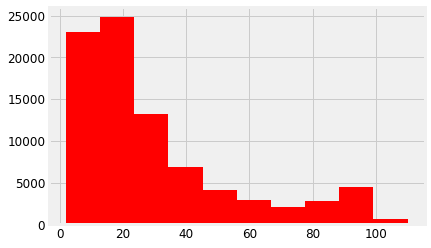

In [9]:
model['M'].hist(color='red');

Вывод - распределение экспоненциальное

In [10]:
model['M'].median(), model['M'].mode()[0], model['M'].mean()

(20.7251, 14.7686, 29.468603799564328)

    В экспериментах на коллайдере инвариантная масса вычисляется
$$ M^2 = 2 p_{T 1} p_{T 2} ( \cosh(\eta_1 - \eta_2) - \cos (\phi_1 - \phi_2) )$$

In [11]:
model[['pt1', 'pt2', 'eta1', 'eta2', 'phi1', 'phi2', 'M']].iloc[0]

pt1     20.628000
pt2      2.522550
eta1     0.571144
eta2     0.197459
phi1     1.795240
phi2    -2.596300
M       12.010100
Name: 0, dtype: float64

In [12]:
# Рассчитаем М для первого объекта
M_squared = 2*20.628000*2.52255*(np.cosh(0.571144-0.197459) - np.cos(1.795240-(-2.596300)))
round(np.sqrt(M_squared), 4)

12.0101

Значение совпало с табличным. Заполним по этой формуле пропуски 

In [13]:
model['M'] = model['M'].fillna(round(np.sqrt(2*model['pt1']*model['pt2']*(np.cosh(model['eta1']-model['eta2']) - np.cos(model['phi1']-model['phi2']))), 4))

In [14]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84999 entries, 0 to 84998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     84999 non-null  int64  
 1   Event   84999 non-null  int64  
 2   E1      84999 non-null  float64
 3   px1     84999 non-null  float64
 4   py1     84999 non-null  float64
 5   pz1     84999 non-null  float64
 6   pt1     84999 non-null  float64
 7   eta1    84999 non-null  float64
 8   phi1    84999 non-null  float64
 9   Q1      84999 non-null  int64  
 10  E2      84999 non-null  float64
 11  px2     84999 non-null  float64
 12  py2     84999 non-null  float64
 13  pz2     84999 non-null  float64
 14  pt2     84999 non-null  float64
 15  eta2    84999 non-null  float64
 16  phi2    84999 non-null  float64
 17  M       84999 non-null  float64
 18  Q2      84999 non-null  int64  
dtypes: float64(15), int64(4)
memory usage: 12.3 MB


Посмотрим на распределение признаков, перед этим заметив дубликаты строк в данных

In [15]:
len(model['Event'].unique()), model.shape[0]

(84978, 84999)

In [16]:
# Кол-во одинаковых Event - номер произошедшего события
print(abs(len(model['Event'].unique())-model.shape[0]))

21


In [17]:
model.duplicated('Event')[model.duplicated('Event')==True]

33       True
650      True
5283     True
7802     True
7803     True
8003     True
9451     True
9682     True
13374    True
22733    True
27644    True
31629    True
38773    True
40887    True
43186    True
45056    True
45057    True
47063    True
50020    True
59289    True
66673    True
dtype: bool

In [18]:
# Индексы одинаковых Event
indx = pd.DataFrame(model.duplicated('Event')[model.duplicated('Event')==True], columns=['event']).index

In [19]:
indx

Int64Index([   33,   650,  5283,  7802,  7803,  8003,  9451,  9682, 13374,
            22733, 27644, 31629, 38773, 40887, 43186, 45056, 45057, 47063,
            50020, 59289, 66673],
           dtype='int64')

In [20]:
model.iloc[[i for i in indx]].sort_values('Event')

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
66673,146511,337473110,15.71730,2.24306,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,59.26850,1
9451,146511,337653458,17.69410,-4.45133,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,13.02770,-1
13374,146511,337851094,3.85730,1.01194,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,14.52880,1
40887,146511,338078762,18.47870,5.56537,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,26.77250,-1
47063,148029,418006834,21.83980,-19.43140,-9.038480,-4.20742,21.43070,-0.195087,-2.706210,-1,7.19454,-6.138480,-1.895570,-3.23839,6.42450,-0.484849,-2.842080,3.76546,1
45057,148029,439950319,170.04500,-33.42060,12.421300,166.26500,35.65430,2.244160,2.785750,1,9.52881,-2.456490,0.300765,9.20182,2.47483,2.023990,3.019760,3.01778,1
45056,148029,439950319,170.04500,-33.42060,12.421300,166.26500,35.65430,2.244160,2.785750,1,9.52881,-2.456490,0.300765,9.20182,2.47483,2.023990,3.019760,3.01778,1
7802,148029,440012942,15.36380,13.10880,1.828450,7.80152,13.23570,0.559741,0.138589,1,3.66866,-1.854610,2.395090,2.06955,3.02920,0.638851,2.229690,10.96820,1
7803,148029,440012942,15.36380,13.10880,1.828450,7.80152,13.23570,0.559741,0.138589,1,3.66866,-1.854610,2.395090,2.06955,3.02920,0.638851,2.229690,10.96820,1
5283,147754,518989177,8.33115,2.40099,-0.130240,-7.97661,2.40452,-1.914290,-0.054191,-1,90.71060,-14.591700,7.491880,-89.21530,16.40270,-2.395100,2.667260,12.65690,1


In [21]:
model[model['Event']==model.iloc[47063][1]]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
5352,147114,418006834,18.7789,5.74359,7.40263,-16.27450,9.36951,-1.319410,0.910934,1,61.61360,23.14570,5.76582,-56.80910,23.8530,-1.602350,0.244141,10.66540,1
47063,148029,418006834,21.8398,-19.43140,-9.03848,-4.20742,21.43070,-0.195087,-2.706210,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.842080,3.76546,1


In [22]:
model.iloc[[47063]]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
47063,148029,418006834,21.8398,-19.4314,-9.03848,-4.20742,21.4307,-0.195087,-2.70621,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.84208,3.76546,1


Удалим их

In [23]:
model.drop_duplicates(inplace=True)
model.drop(index=[47063], inplace=True)

In [24]:
model = model.reset_index(drop=True)

In [25]:
model

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
0,148029,410503113,24.08500,-4.591070,20.110600,12.43260,20.628000,0.571144,1.795240,-1,2.57188,-2.15672,-1.30836,0.501343,2.52255,0.197459,-2.596300,12.0101,1
1,148031,147290061,22.94630,-4.677580,5.187980,-21.85720,6.985340,-1.858470,2.304500,1,67.16120,-8.24769,11.37090,-65.675800,14.04710,-2.246710,2.198320,4.0102,1
2,148029,86810610,2.39342,0.346488,-1.935140,1.36514,1.965920,0.648077,-1.393620,1,33.86190,-30.87370,-8.12102,11.291100,31.92390,0.346700,-2.884380,11.0103,1
3,149181,1298157807,80.32260,-14.435900,26.110100,74.57610,29.835100,1.647090,2.075850,1,22.38180,2.30876,7.14518,21.084600,7.50892,1.755900,1.258260,12.0104,-1
4,147754,125401937,3.20864,2.846250,-0.351847,-1.43891,2.867910,-0.482756,-0.122994,1,27.96590,-4.05881,-9.86542,-25.851300,10.66770,-1.618370,-1.961110,11.0105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84973,149181,364414548,1.40699,-0.728904,0.647857,1.01420,0.975202,0.909370,2.414990,-1,24.62280,-12.73870,11.36170,17.746000,17.06930,0.909127,2.413270,0.0071,1
84974,146944,654554592,24.21200,10.780400,-12.116100,17.97790,16.217800,0.956076,-0.843667,1,2.62073,1.16556,-1.31086,1.947150,1.75410,0.957094,-0.844003,0.0057,-1
84975,147929,252498172,2.71035,0.258549,1.792850,2.01614,1.811400,0.959084,1.427570,-1,19.28590,1.83493,12.76360,14.341100,12.89480,0.958503,1.428010,0.0035,1
84976,146944,140039199,3.47801,-0.733209,2.166230,2.62038,2.286960,0.980804,1.897160,-1,16.78890,-3.52827,10.45790,12.651100,11.03700,0.981098,1.896180,0.0051,1


Посмотрим распределение непрерывных величин

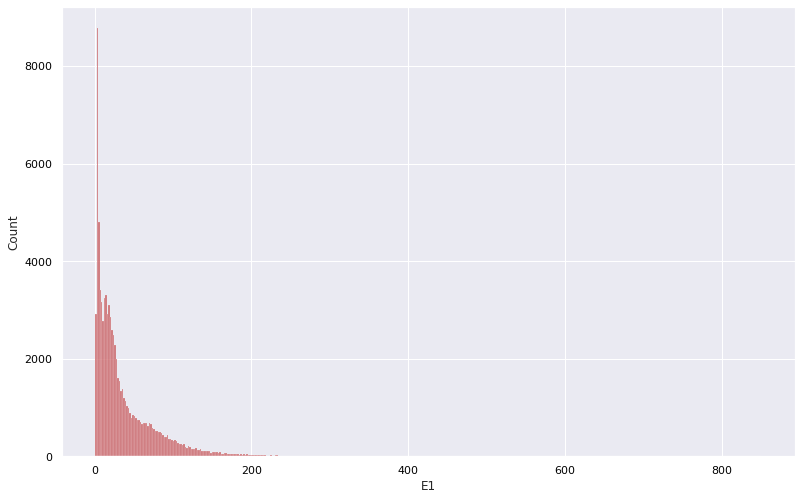

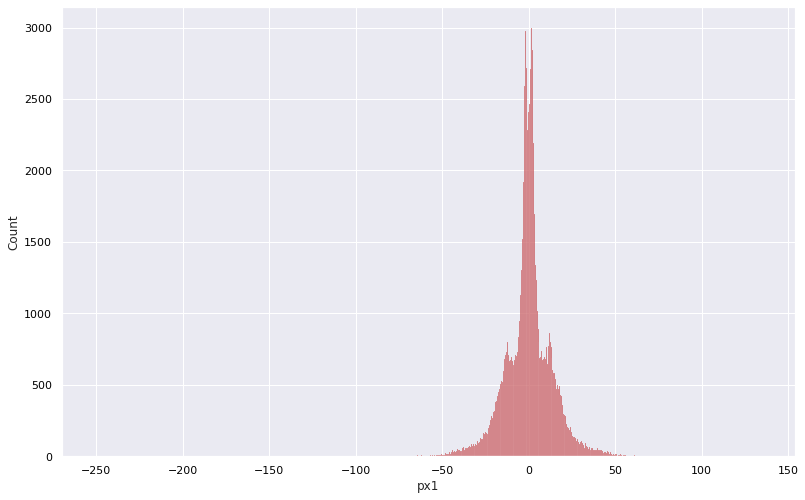

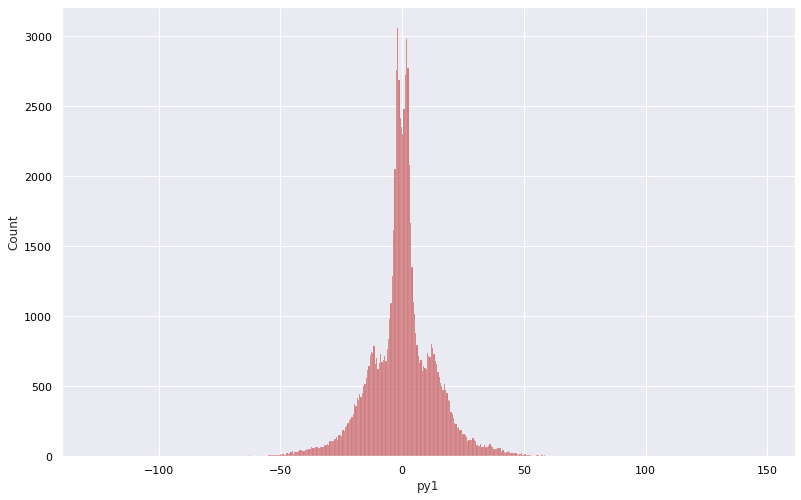

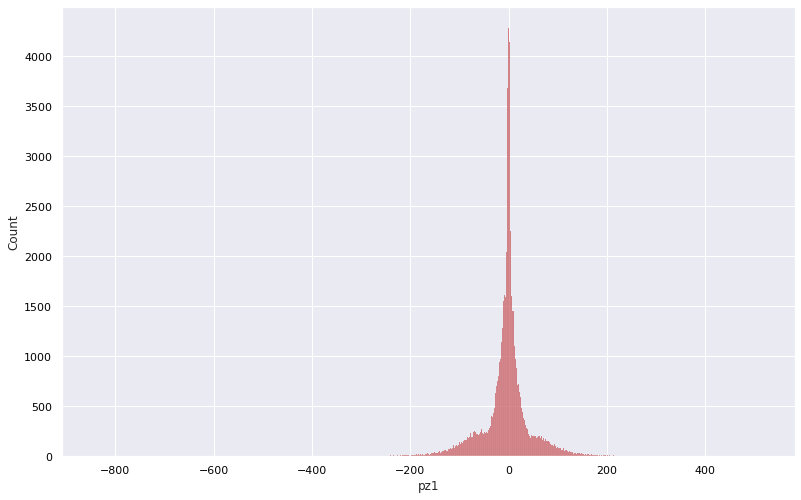

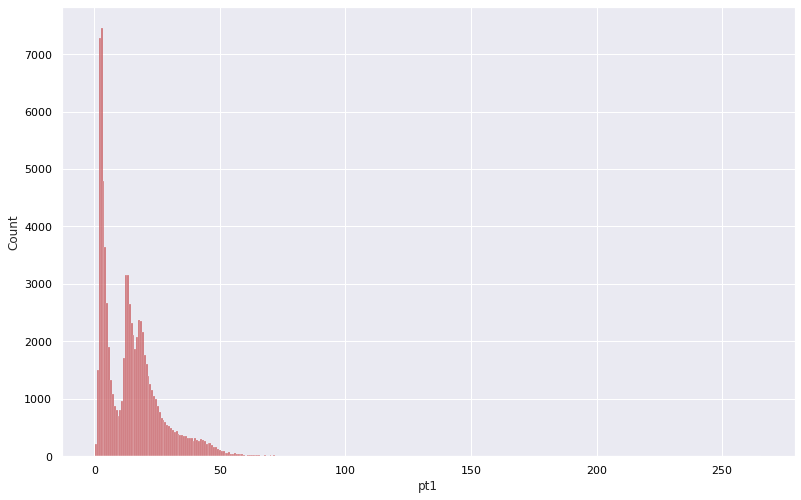

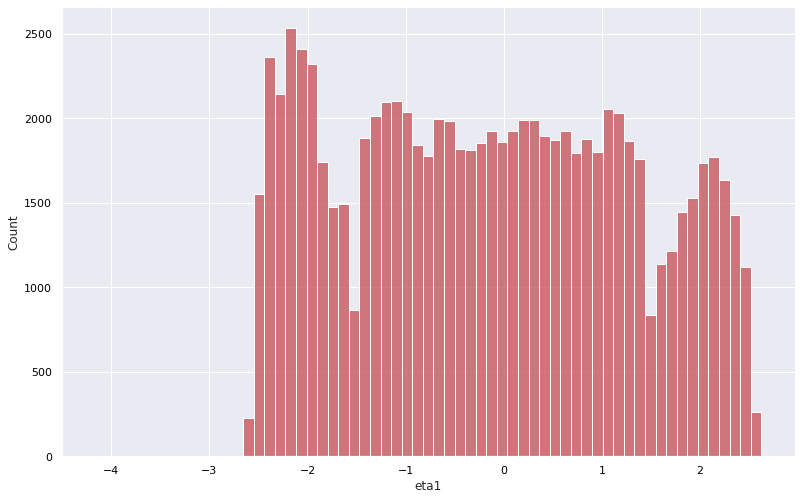

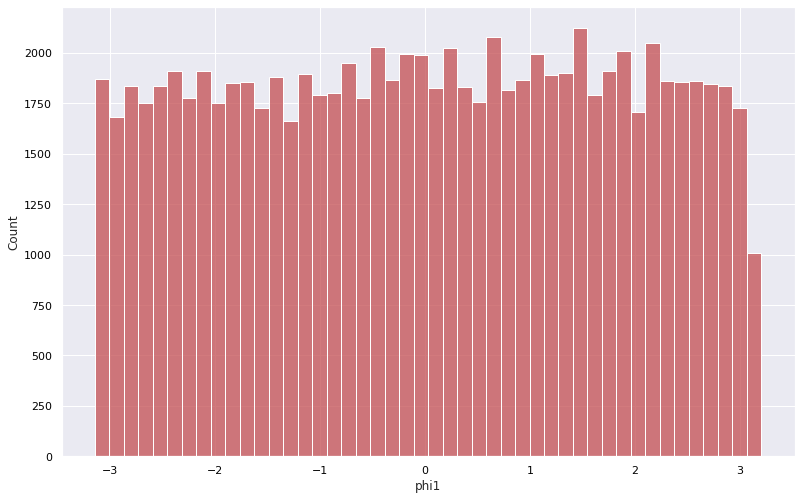

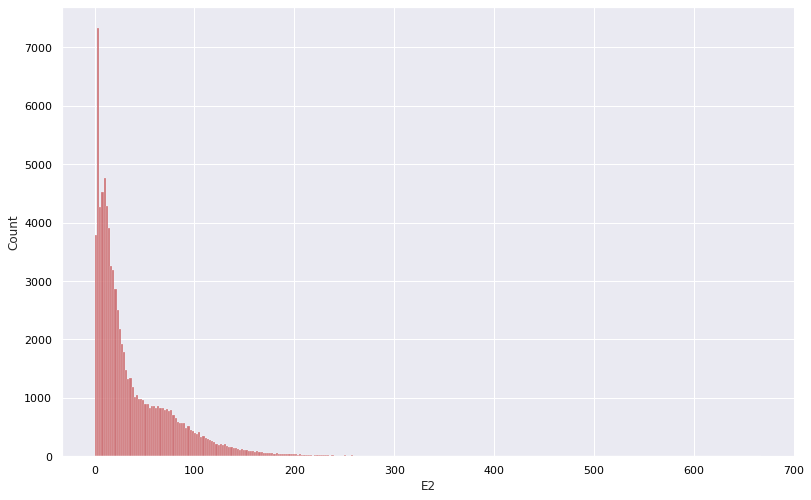

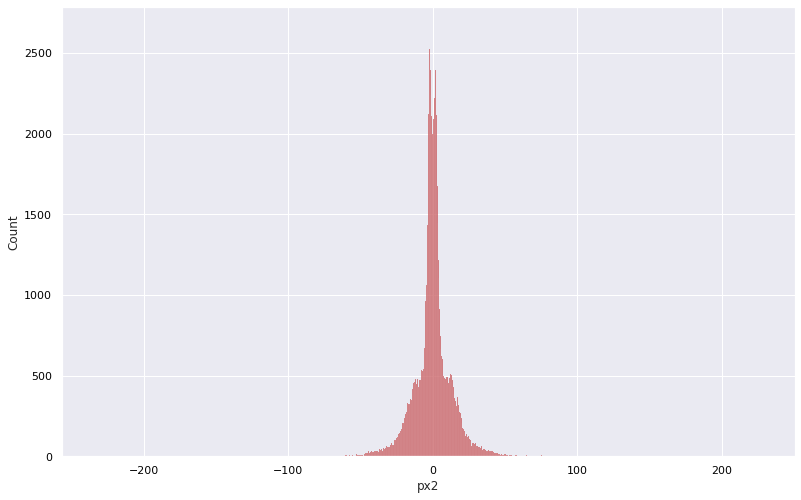

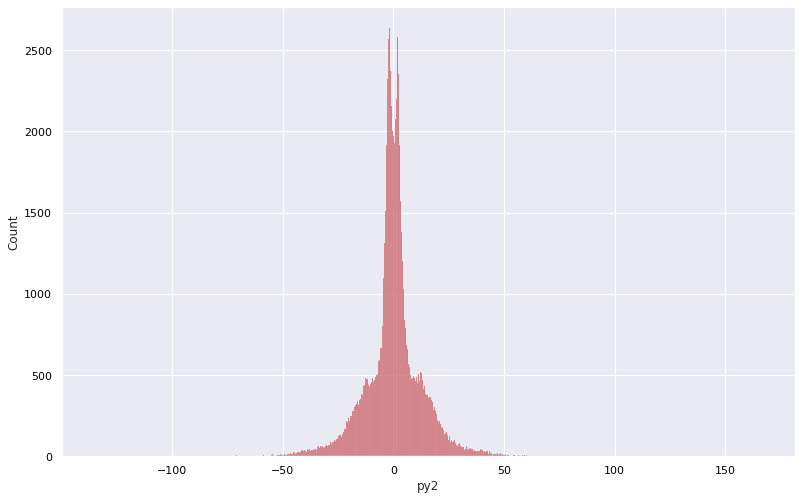

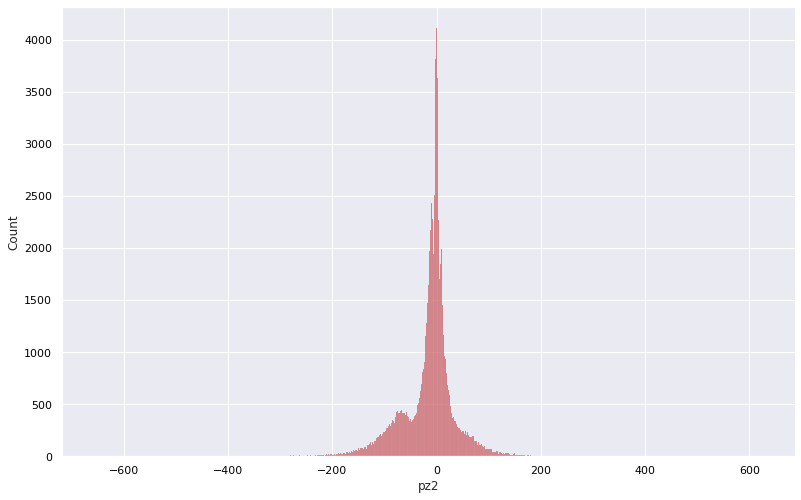

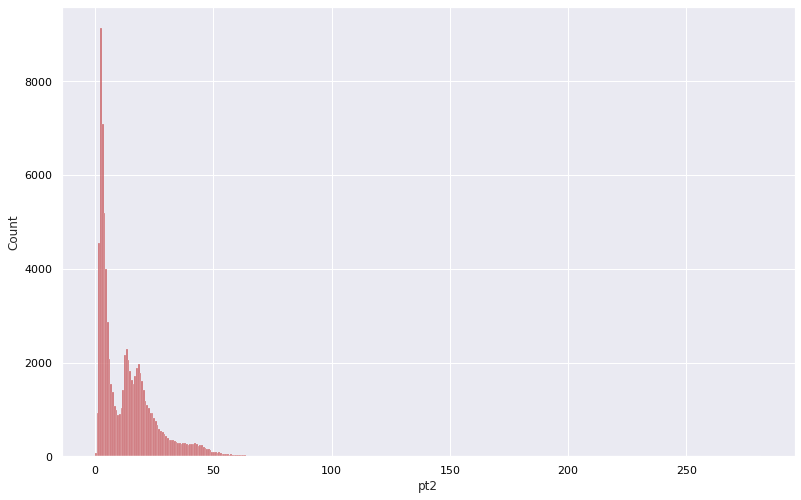

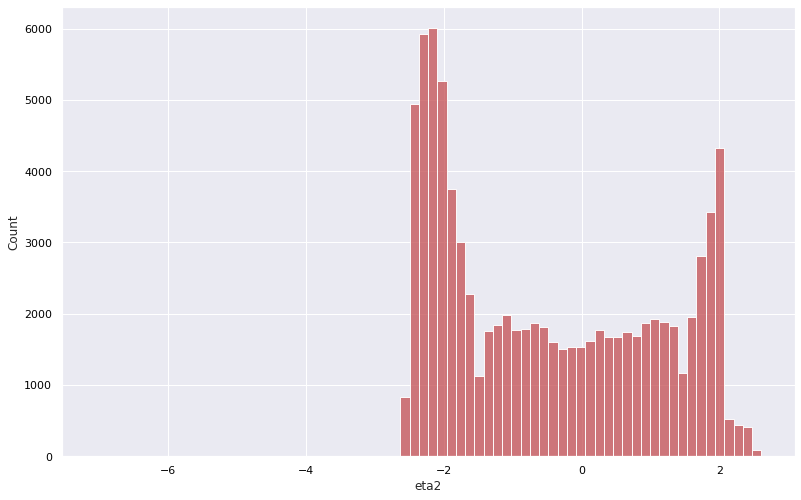

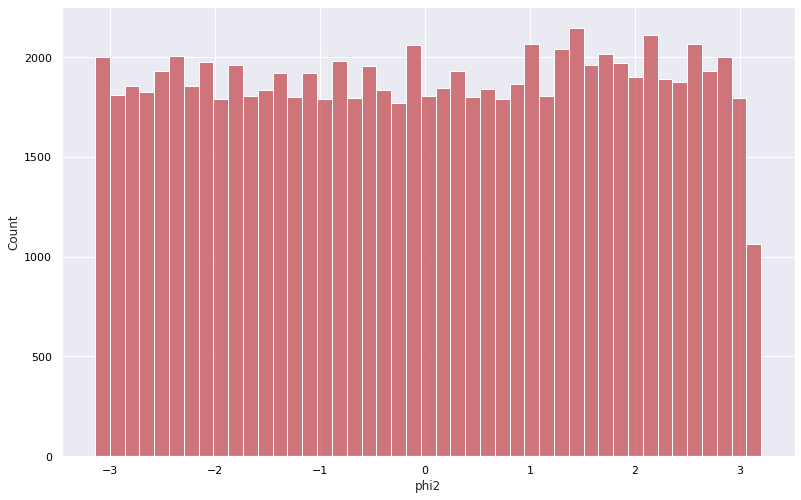

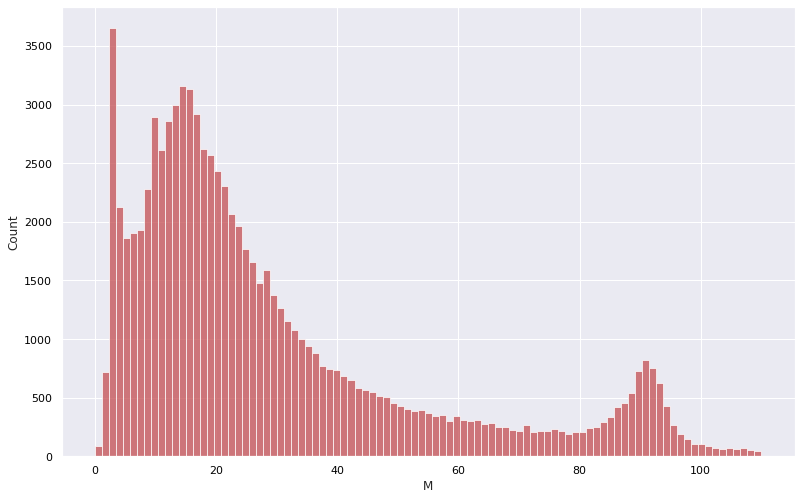

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in model.columns:
    if i not in ['Q1', 'Q2', 'Event', 'Run']:  # discrete values
        sns.histplot(model[i], color='r');
        plt.show();

Распределение дискретных величин

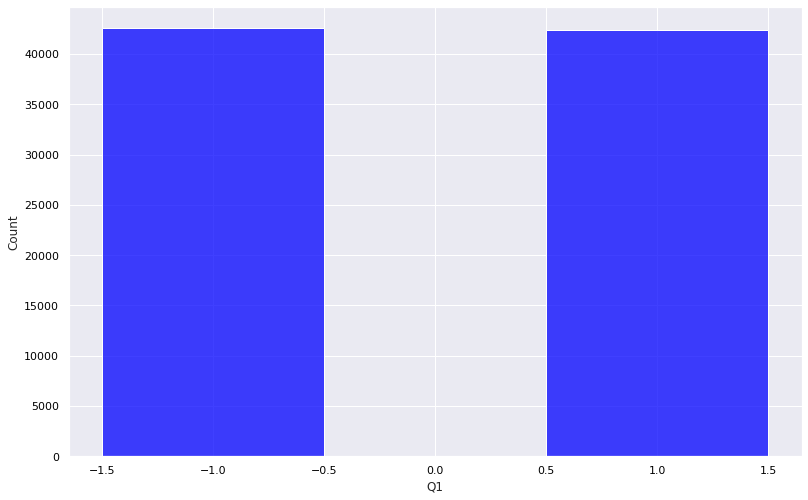

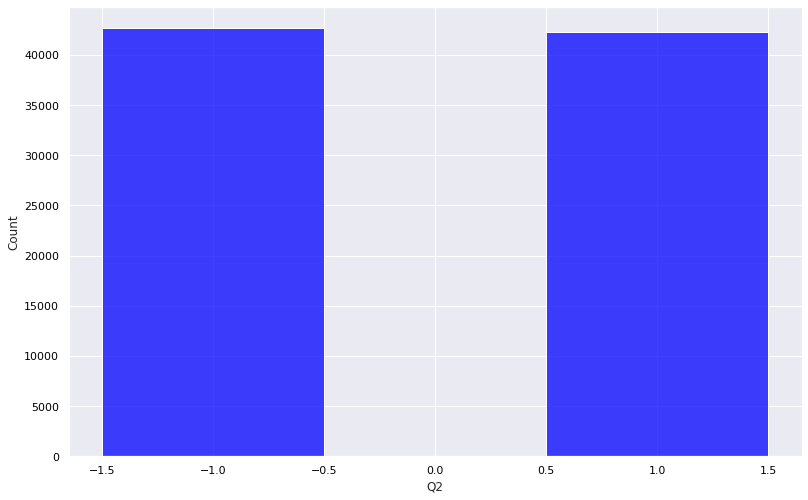

In [27]:
for i in ['Q1', 'Q2']:
    sns.histplot(model[i], color='blue', discrete=True);
    plt.show();

**Вывод** Задача сбалансирована

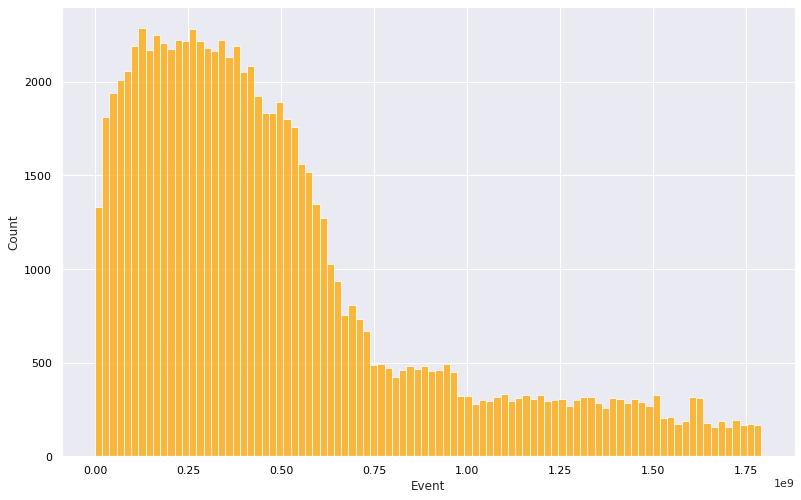

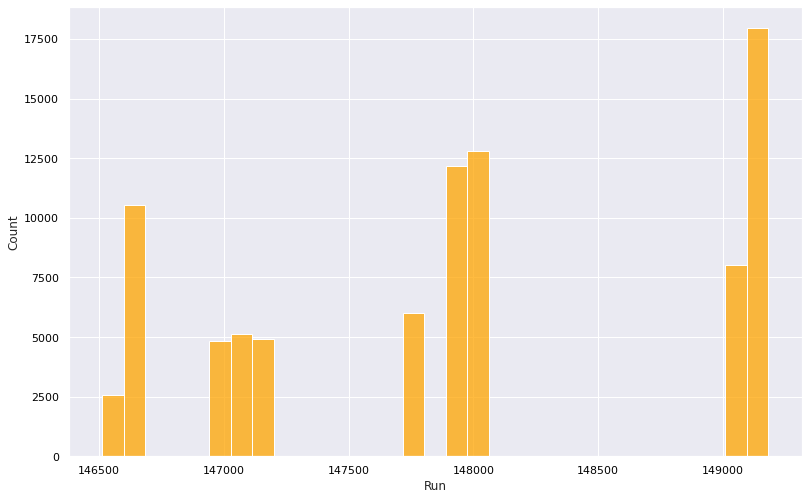

In [28]:
for i in ['Event', 'Run']:
    sns.histplot(model[i], color='orange');
    plt.show();

**Вывод** *Run* - дискретная величина
*Event* - порядковый номер

*Event* можно удалить. В результате все фичи, кроме *Q1, Q2, Run*- числовые непрерывные

Перед тем, как что-то удалять, посмотрим с помощью оценки IV важность каждого признака

In [29]:
max_bin = 7
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [30]:
import scipy.stats.stats as stats

warnings.warn('my warning')
final_iv, IV = data_vars(model, model['Q2'])

In [31]:
IV.sort_values(by='IV',ascending=False)

,VAR_NAME,IV
4,Q1,63.014881
1,E2,3.412939
11,pt2,3.159754
5,Run,2.885431
10,pt1,1.899420
16,pz1,1.529591
8,phi1,1.179757
12,px1,1.161319
0,E1,1.123087
13,px2,1.066489


Посмотрим на матрицу корреляции фичей

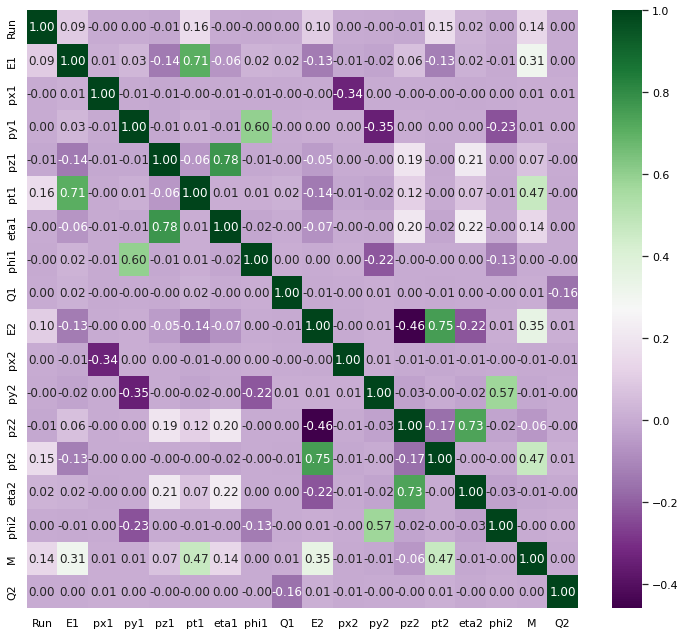

In [32]:
fig, ax = plt.subplots(figsize=(11, 11))

sns.heatmap(ax=ax, 
            data=model.drop(['Event'], axis=1).corr(), 
            annot = True, 
            cmap='PRGn', 
            fmt=".2f"
           )
plt.tick_params(colors = 'black')
plt.show();

Посмотрим на коррелирующие фичи и выбросы

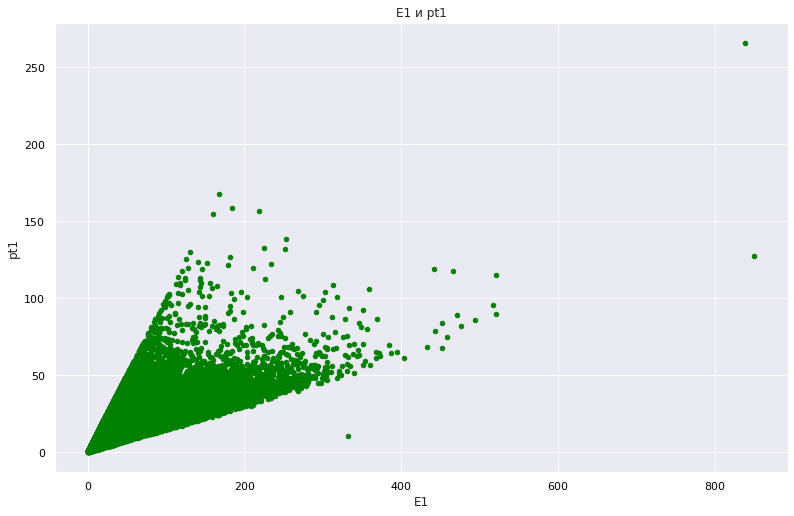

In [33]:
plt.scatter(model['E1'], model['pt1'], s=20, color = 'green');
plt.title('E1 и pt1');
plt.xlabel('E1');
plt.ylabel('pt1');

In [34]:
# Индексы выбросов
print(np.where((model['pt1']<25) & (model['E1']>300)))
print(np.where((model['pt1']>100) & (model['E1']>800)))

(array([11859]),)
(array([57539, 81910]),)


In [35]:
model = model.drop(index=[11859, 57539, 81910])
model = model.reset_index(drop=True)
model.shape

(84975, 19)

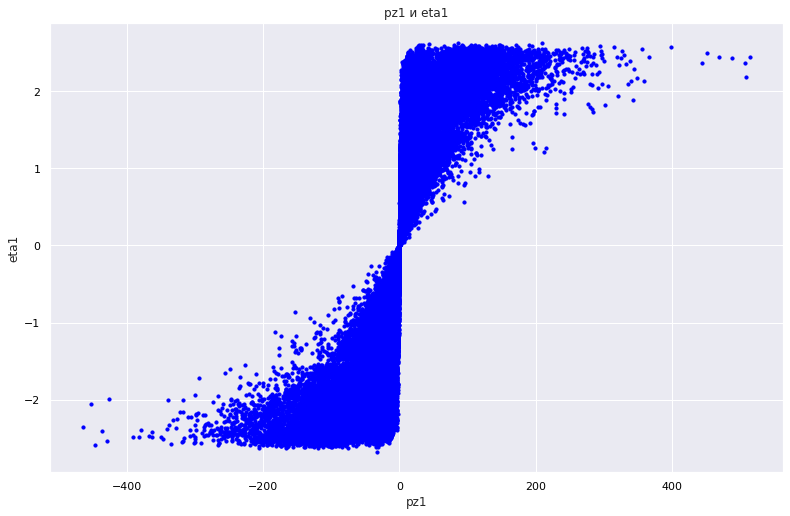

In [36]:
plt.scatter(model['pz1'], model['eta1'], s=10, color = 'blue');
plt.title('pz1 и eta1');
plt.xlabel('pz1');
plt.ylabel('eta1');

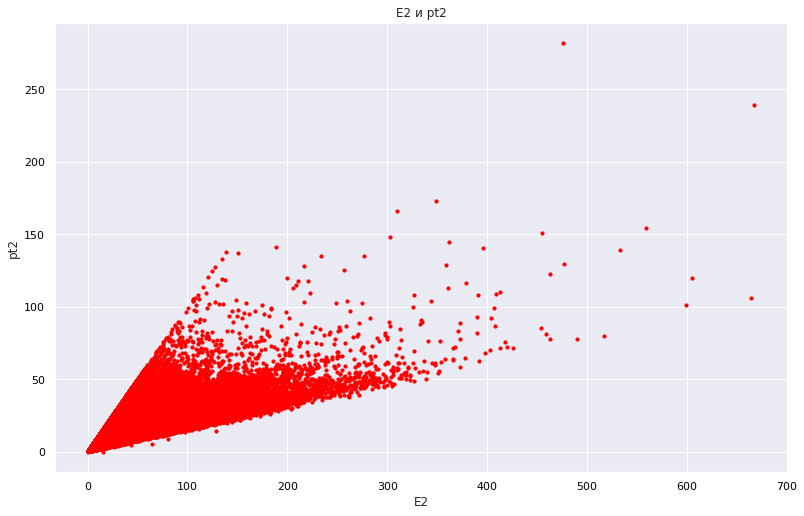

In [37]:
plt.scatter(model['E2'], model['pt2'], s=10, color = 'red');
plt.title('E2 и pt2');
plt.xlabel('E2');
plt.ylabel('pt2');

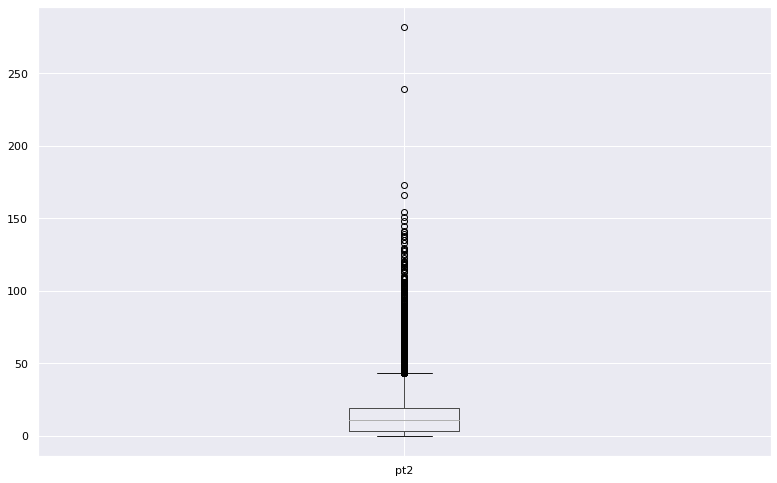

In [38]:
model.boxplot(column=['pt2']);

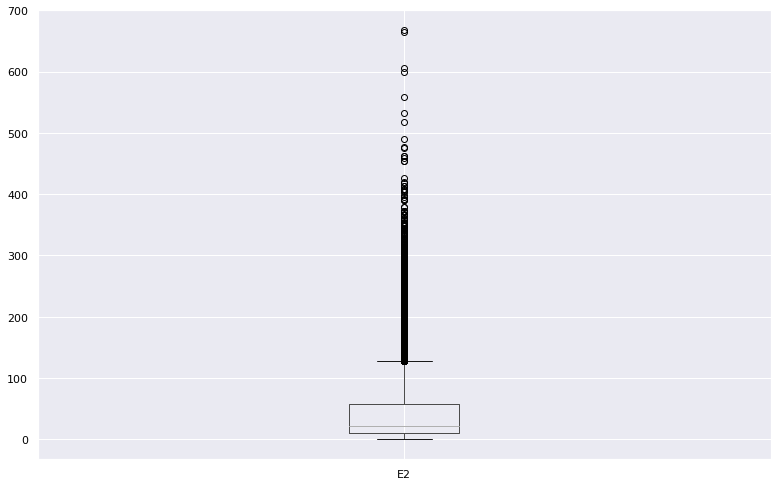

In [39]:
model.boxplot(column=['E2']);

In [40]:
# model[model['pt2']>200]

In [41]:
# model.iloc[82500:82520]

In [42]:
# Индексы выбросов
print(np.where((model['pt2']>200) & (model['E2']>400)))
print(np.where((model['pt2']>90) & (model['E2']>550)))

(array([82481, 83441]),)
(array([61746, 81665, 83149, 83441, 84752]),)


In [43]:
model = model.drop(index=[82481, 83441, 61746, 81665, 83149, 84752])
model = model.reset_index(drop=True)
model.shape

(84969, 19)

In [44]:
print(np.where(model['pt2']>160))
print(np.where(model['E2']>500))

(array([53677, 81875]),)
(array([50717, 52343]),)


In [45]:
model = model.drop(index=[53677, 81875, 50717, 52343])
model = model.reset_index(drop=True)
model.shape

(84965, 19)

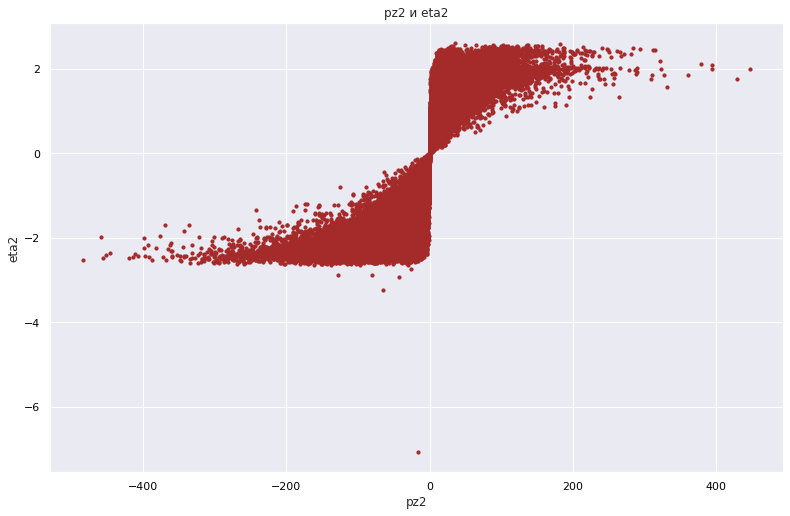

In [46]:
plt.scatter(model['pz2'], model['eta2'], s=10, color = 'brown');
plt.title('pz2 и eta2');
plt.xlabel('pz2');
plt.ylabel('eta2');

In [47]:
# Индексы выбросов
print(np.where((model['eta2']<-6)))

(array([19167]),)


In [48]:
model = model.drop(index=[19167])
model = model.reset_index(drop=True)
model.shape

(84964, 19)

In [49]:
# Индексы выбросов
indx = list([i for i in np.where((model['pz2']>405))][0])
indx

[59337, 60288]

In [50]:
model = model.drop(index=[i for i in indx])
model = model.reset_index(drop=True)
model.shape

(84962, 19)

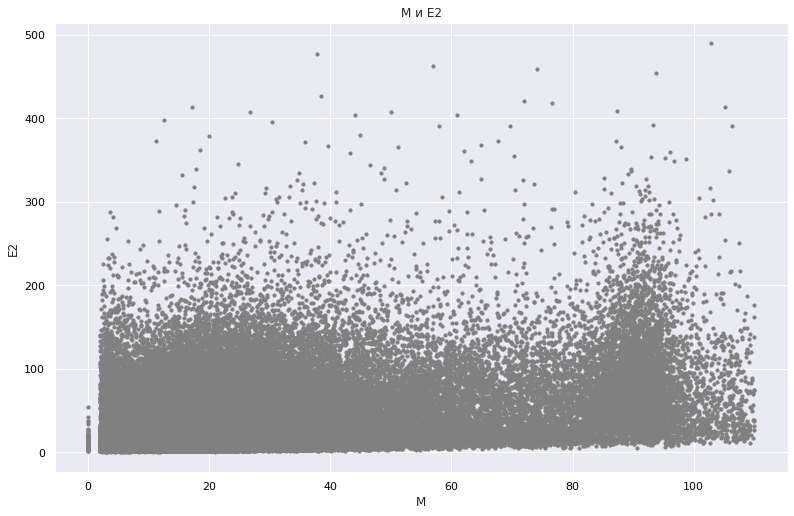

In [51]:
plt.scatter(model['M'], model['E2'], s=10, color = 'grey');
plt.title('M и E2');
plt.xlabel('M');
plt.ylabel('E2');

    Итого корреляция больше 0.7:
* E1/pt1
* pz1/eta1
* E2/pt2
* eta2/pz2

      IV < 1:
    
* pz2
* eta2
* Event
* py1
* M
* eta1
* py2
* phi2

Пока не будем ничего убирать, кроме целевой переменной Q2

In [52]:
final_model = model.drop(['Q2', 'Event'], axis = 1)

In [53]:
final_model.shape

(84962, 17)

Произведем центрирование по медиане и нормирование всех дискретных фичей

In [54]:
final_model.columns

Index(['Run', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'E2',
       'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'M'],
      dtype='object')

In [55]:
final_model['Q1'].unique()

array([-1,  1])

In [56]:
col_sc = [i for i in final_model.columns if len(final_model[i].unique())<=25]
medianValue = final_model[col_sc].median();
medianValue

Run    147929.0
Q1         -1.0
dtype: float64

### Центрирование по медиане и стандартизация категориальных признаков(median_final_model)

In [57]:
# Произведем центрирование по медиане и стандартизируем

scaler = StandardScaler(with_mean = 'False')

for i in final_model.columns:
    median_final_model = final_model.copy()
    if i in col_sc:
        median_final_model[i] = median_final_model[i]-medianValue[i]
      
# median_final_model

median_final_model[col_sc] = scaler.fit_transform(median_final_model[col_sc])
col = [i for i in final_model.columns]
median_final_model = pd.DataFrame(median_final_model, columns=col) 

median_final_model

,Run,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M
0,0.093316,24.08500,-4.591070,20.110600,12.43260,20.628000,0.571144,1.795240,-0.998260,2.57188,-2.15672,-1.30836,0.501343,2.52255,0.197459,-2.596300,12.0101
1,0.095493,22.94630,-4.677580,5.187980,-21.85720,6.985340,-1.858470,2.304500,1.001743,67.16120,-8.24769,11.37090,-65.675800,14.04710,-2.246710,2.198320,4.0102
2,0.093316,2.39342,0.346488,-1.935140,1.36514,1.965920,0.648077,-1.393620,1.001743,33.86190,-30.87370,-8.12102,11.291100,31.92390,0.346700,-2.884380,11.0103
3,1.347226,80.32260,-14.435900,26.110100,74.57610,29.835100,1.647090,2.075850,1.001743,22.38180,2.30876,7.14518,21.084600,7.50892,1.755900,1.258260,12.0104
4,-0.206012,3.20864,2.846250,-0.351847,-1.43891,2.867910,-0.482756,-0.122994,1.001743,27.96590,-4.05881,-9.86542,-25.851300,10.66770,-1.618370,-1.961110,11.0105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84957,1.347226,1.40699,-0.728904,0.647857,1.01420,0.975202,0.909370,2.414990,-0.998260,24.62280,-12.73870,11.36170,17.746000,17.06930,0.909127,2.413270,0.0071
84958,-1.087668,24.21200,10.780400,-12.116100,17.97790,16.217800,0.956076,-0.843667,1.001743,2.62073,1.16556,-1.31086,1.947150,1.75410,0.957094,-0.844003,0.0057
84959,-0.015531,2.71035,0.258549,1.792850,2.01614,1.811400,0.959084,1.427570,-0.998260,19.28590,1.83493,12.76360,14.341100,12.89480,0.958503,1.428010,0.0035
84960,-1.087668,3.47801,-0.733209,2.166230,2.62038,2.286960,0.980804,1.897160,-0.998260,16.78890,-3.52827,10.45790,12.651100,11.03700,0.981098,1.896180,0.0051


### Центрирование по среднему и стандартизация всех фичей (Mean_final_model)

In [58]:
scaler = StandardScaler(with_mean = 'True')

# mean_final_model

mean_final_model = final_model.copy()
mean_final_model = scaler.fit_transform(mean_final_model)
col = [i for i in final_model.columns]
mean_final_model = pd.DataFrame(mean_final_model, columns=col) 

mean_final_model

,Run,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M
0,0.093316,-0.315293,-0.345491,1.445054,0.320483,0.460309,0.499039,0.985031,-0.998260,-0.854372,-0.162702,-0.111859,0.283454,-0.885134,0.440796,-1.441155,-0.691669
1,0.095493,-0.343040,-0.351801,0.361221,-0.344310,-0.630259,-1.185729,1.268064,1.001743,0.663856,-0.627250,0.851579,-0.973599,0.030447,-1.133983,1.195178,-1.009190
2,0.093316,-0.843871,0.014650,-0.156133,0.105913,-1.031502,0.552386,-0.787257,1.001743,-0.118873,-2.352898,-0.629521,0.488408,1.450690,0.536952,-1.599556,-0.731352
3,1.347226,1.055100,-1.063565,1.880798,1.525290,1.196307,1.245132,1.140986,1.001743,-0.388723,0.177873,0.530486,0.674438,-0.488986,1.444900,0.678284,-0.691657
4,-0.206012,-0.824006,0.196980,-0.041138,0.051549,-0.959399,-0.231767,-0.081075,1.001743,-0.257464,-0.307771,-0.762070,-0.217122,-0.238033,-0.729143,-1.091894,-0.731344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84957,1.347226,-0.867908,-0.063788,0.031471,0.099109,-1.110699,0.733575,1.329472,-0.998260,-0.336046,-0.969772,0.850880,0.611021,0.270549,0.899324,1.313368,-1.168075
84958,-1.087668,-0.312198,0.775690,-0.895578,0.427993,0.107766,0.765962,-0.481607,1.001743,-0.853224,0.090683,-0.112049,0.310917,-0.946184,0.930229,-0.477650,-1.168131
84959,-0.015531,-0.836148,0.008236,0.114632,0.118534,-1.043854,0.768048,0.780689,-0.998260,-0.461495,0.141735,0.957404,0.546344,-0.061099,0.931137,0.771621,-1.168218
84960,-1.087668,-0.817442,-0.064102,0.141751,0.130249,-1.005839,0.783109,1.041675,-0.998260,-0.520189,-0.267308,0.782205,0.514242,-0.208694,0.945695,1.029045,-1.168154


### Без маштабирования, стандартизации, нормализации

In [59]:
final_model

,Run,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M
0,148029,24.08500,-4.591070,20.110600,12.43260,20.628000,0.571144,1.795240,-1,2.57188,-2.15672,-1.30836,0.501343,2.52255,0.197459,-2.596300,12.0101
1,148031,22.94630,-4.677580,5.187980,-21.85720,6.985340,-1.858470,2.304500,1,67.16120,-8.24769,11.37090,-65.675800,14.04710,-2.246710,2.198320,4.0102
2,148029,2.39342,0.346488,-1.935140,1.36514,1.965920,0.648077,-1.393620,1,33.86190,-30.87370,-8.12102,11.291100,31.92390,0.346700,-2.884380,11.0103
3,149181,80.32260,-14.435900,26.110100,74.57610,29.835100,1.647090,2.075850,1,22.38180,2.30876,7.14518,21.084600,7.50892,1.755900,1.258260,12.0104
4,147754,3.20864,2.846250,-0.351847,-1.43891,2.867910,-0.482756,-0.122994,1,27.96590,-4.05881,-9.86542,-25.851300,10.66770,-1.618370,-1.961110,11.0105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84957,149181,1.40699,-0.728904,0.647857,1.01420,0.975202,0.909370,2.414990,-1,24.62280,-12.73870,11.36170,17.746000,17.06930,0.909127,2.413270,0.0071
84958,146944,24.21200,10.780400,-12.116100,17.97790,16.217800,0.956076,-0.843667,1,2.62073,1.16556,-1.31086,1.947150,1.75410,0.957094,-0.844003,0.0057
84959,147929,2.71035,0.258549,1.792850,2.01614,1.811400,0.959084,1.427570,-1,19.28590,1.83493,12.76360,14.341100,12.89480,0.958503,1.428010,0.0035
84960,146944,3.47801,-0.733209,2.166230,2.62038,2.286960,0.980804,1.897160,-1,16.78890,-3.52827,10.45790,12.651100,11.03700,0.981098,1.896180,0.0051


In [60]:
model # С неубранными фичами

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
0,148029,410503113,24.08500,-4.591070,20.110600,12.43260,20.628000,0.571144,1.795240,-1,2.57188,-2.15672,-1.30836,0.501343,2.52255,0.197459,-2.596300,12.0101,1
1,148031,147290061,22.94630,-4.677580,5.187980,-21.85720,6.985340,-1.858470,2.304500,1,67.16120,-8.24769,11.37090,-65.675800,14.04710,-2.246710,2.198320,4.0102,1
2,148029,86810610,2.39342,0.346488,-1.935140,1.36514,1.965920,0.648077,-1.393620,1,33.86190,-30.87370,-8.12102,11.291100,31.92390,0.346700,-2.884380,11.0103,1
3,149181,1298157807,80.32260,-14.435900,26.110100,74.57610,29.835100,1.647090,2.075850,1,22.38180,2.30876,7.14518,21.084600,7.50892,1.755900,1.258260,12.0104,-1
4,147754,125401937,3.20864,2.846250,-0.351847,-1.43891,2.867910,-0.482756,-0.122994,1,27.96590,-4.05881,-9.86542,-25.851300,10.66770,-1.618370,-1.961110,11.0105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84957,149181,364414548,1.40699,-0.728904,0.647857,1.01420,0.975202,0.909370,2.414990,-1,24.62280,-12.73870,11.36170,17.746000,17.06930,0.909127,2.413270,0.0071,1
84958,146944,654554592,24.21200,10.780400,-12.116100,17.97790,16.217800,0.956076,-0.843667,1,2.62073,1.16556,-1.31086,1.947150,1.75410,0.957094,-0.844003,0.0057,-1
84959,147929,252498172,2.71035,0.258549,1.792850,2.01614,1.811400,0.959084,1.427570,-1,19.28590,1.83493,12.76360,14.341100,12.89480,0.958503,1.428010,0.0035,1
84960,146944,140039199,3.47801,-0.733209,2.166230,2.62038,2.286960,0.980804,1.897160,-1,16.78890,-3.52827,10.45790,12.651100,11.03700,0.981098,1.896180,0.0051,1


Перед обучением важно проверять баланс данных: нет ли такого, что одному классу принадлежит более 70% строк. В наших данных дисбаланса нет.

In [61]:
model['Q2'].value_counts()

-1    42668
 1    42294
Name: Q2, dtype: int64

Перед нами сбалансированная задача бинарной классификации

# Обучение моделей

### Базовый алгоритм

Делим наши данные на train и test.

In [62]:
y = model['Q2']
X = median_final_model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

Модель, выбранная в бейзлайне - случайный лес. Она не является оптимальной, но быстро обучается и позволяет получить результат, который выше случайного. Можете начать улучшать бейзлайлн с того, что попробовать изменить гиперпараметры представленного случайного леса.

In [63]:
%%time
rfc = RandomForestClassifier(random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

CPU times: user 41.4 s, sys: 130 ms, total: 41.5 s
Wall time: 5.61 s


RandomForestClassifier(n_jobs=-1, random_state=42)

Получаем результат 

In [65]:
pred = rfc.predict(X_test)

Хдесь мы оцениваем то, насколько точно работает наша модель. Здесь мы смотрим 2 метрики: accuracy и F1. Обращаем внимание, что итоговый результат будет измеряться на основании F1.

In [66]:
accuracy_score(y_test, pred)

0.5692651732119738

In [67]:
f1_score(y_test, pred, average = 'weighted')

0.5690369882087779

### Логистическая регрессия

In [68]:
y = model['Q2']
X = mean_final_model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [69]:
lr = LogisticRegression(penalty='l2', # наличие регуляризации и её вид
dual=False, # двоичная/первичная формулировка(имеет смысл при l2 и liblinear, объекты<признаки
tol=0.0001, # критерий остановки
C=5, # относит. сила регуляризации (default=1). Чем меньше, тем больше регуляризация
fit_intercept=True, # следует ли добавлять смещение bias
intercept_scaling=1, # для liblinear & fit_int=True, масштаб bias
class_weight='balanced', # веса, относящиеся к каждому классу(default=None)
random_state=None, # какой генератор псевдослуч чисел использовать
solver='lbfgs', # алгоритм оптимизации(решатель для подпора модели)
max_iter=100, # количество итераций при подгонке модели
multi_class='ovr', # подход к использованию нескольких классов
verbose=0, # степень детализации при liblinear и lbfgs
warm_start=False, # следует ли повторно использовать ранее полученное решение
n_jobs=None, # использование ядер. При (-1) использует все доступные ядра
l1_ratio=None # плавающее число точек от нуля до единицы, либо None (по умолчанию). 
# Оно определяет относительную важность части L1 в регуляризации elastic-net.
)

In [70]:
lr.fit(X_train, y_train)

LogisticRegression(C=5, class_weight='balanced', multi_class='ovr')

In [71]:
lr_preds = lr.predict(X_train)
lr_preds_proba = lr.predict_proba(X_train)[:, 1]

In [72]:
# Метрика на трейне
print('accuracy', accuracy_score(y_train, lr_preds))
print('roc_auc', roc_auc_score(y_train, lr_preds_proba))
print('f1_score', f1_score(y_train, lr_preds, average = 'weighted'))

accuracy 0.5789181645452558
roc_auc 0.5846551400852597
f1_score 0.5789169323843523


In [73]:
lr_preds = lr.predict(X_test)
lr_preds_proba = lr.predict_proba(X_test)[:, 1]

In [74]:
# Метрика на валидации
print('accuracy', accuracy_score(y_test, lr_preds))
print('roc_auc', roc_auc_score(y_test, lr_preds_proba))
print('f1_score', f1_score(y_test, lr_preds, average = 'weighted'))

accuracy 0.5799756757817097
roc_auc 0.5842701202800711
f1_score 0.5799799712816059


In [75]:
# Кросс-валидация
cross_val_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))

[0.58224474 0.58390089 0.57956969 0.58067433 0.58117743]
0.5815134168556819


In [76]:
lr_preds_proba[:5], lr_preds
# След-но, во втором массиве вероятность иметь заряд 1(принадл.ко второму классу)

(array([0.42049083, 0.40512594, 0.56671121, 0.56387654, 0.5823602 ]),
 array([-1, -1,  1, ...,  1,  1,  1]))

In [77]:
# Таблица сопряженности
pd.DataFrame(confusion_matrix(y_test, lr_preds))

,0,1
0,7467,5375
1,5331,7316


#### Поиск оптимальных гиперпараметров

In [203]:
param_grid = {
    "penalty": ['l2', 'l1', 'elasticnet'], # норма штрафа
    "tol": [0.0001, 0.00005, 0.0005], # критерий остановки
    "C": [0.5, 3, 1.0], # обратная сила регуляризации
    "fit_intercept": [True, False], # следует ли добавлять константу
    "class_weight": ['balanced', None], # веса
    "solver": ['saga', 'liblinear', 'sag', 'lbfgs', 'newton-cg'], # алгоритм оптимизации
    "max_iter": [100, 150, 50], # количество итераций
    "warm_start": [True, False], # использование решения предыдущего шага
    'multi_class': ['ovr', 'multinomial'] # бинарная классификация
}

In [204]:
lr =  LogisticRegression() # новый необученный объект модели
kfold = KFold(n_splits=5, shuffle=True, random_state=123) # пять фолдов с валидацией и перемешиванием

In [205]:
CV_lr = GridSearchCV(estimator=lr, 
                     param_grid=param_grid, 
                     scoring='roc_auc',
                     cv=kfold, 
                     verbose = 1000) # verbose - будем печатать вывод полностью

In [206]:
CV_lr.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 1/5; 1/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.585 total time=   3.1s
[CV 2/5; 1/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 2/5; 1/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.578 total time=   2.1s
[CV 3/5; 1/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 3/5; 1/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.587

[CV 1/5; 6/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.585 total time=   2.2s
[CV 2/5; 6/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 2/5; 6/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.578 total time=   2.1s
[CV 3/5; 6/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 3/5; 6/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.587 total time=   2.1s
[CV 4/5; 6/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 4/5; 6/144] END C=0.3, class_weig

[CV 2/5; 11/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.578 total time=   0.3s
[CV 3/5; 11/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 3/5; 11/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.587 total time=   0.4s
[CV 4/5; 11/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 4/5; 11/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.576 total time=   0.3s
[CV 5/5; 11/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 5/5

[CV 2/5; 16/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.578 total time=   0.2s
[CV 3/5; 16/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[CV 3/5; 16/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.587 total time=   0.2s
[CV 4/5; 16/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[CV 4/5; 16/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.576 total time=   0.2s
[CV 5/5; 16/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[

[CV 3/5; 21/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.588 total time=   1.1s
[CV 4/5; 21/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True
[CV 4/5; 21/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.577 total time=   1.0s
[CV 5/5; 21/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True
[CV 5/5; 21/144] END C=0.3, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.580 total time=   1.1s
[CV 1/5; 22/144] START C=0.3, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 1/5; 22/144] END C=0.3, class_weight=b

[CV 4/5; 26/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.576 total time=   1.8s
[CV 5/5; 26/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=False
[CV 5/5; 26/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.579 total time=   1.8s
[CV 1/5; 27/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 1/5; 27/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.585 total time=   0.3s
[CV 2/5; 27/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 2/5; 27/1

[CV 4/5; 31/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True;, score=0.576 total time=   0.2s
[CV 5/5; 31/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True
[CV 5/5; 31/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True;, score=0.579 total time=   0.2s
[CV 1/5; 32/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[CV 1/5; 32/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.585 total time=   0.2s
[CV 2/5; 32/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=Fals

[CV 4/5; 36/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False;, score=0.576 total time=   0.3s
[CV 5/5; 36/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 5/5; 36/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False;, score=0.579 total time=   0.4s
[CV 1/5; 37/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=True
[CV 1/5; 37/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.585 total time=   3.4s
[CV 2/5; 37/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=True
[CV 2/5; 37/1

[CV 4/5; 41/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.577 total time=   0.9s
[CV 5/5; 41/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 5/5; 41/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.579 total time=   0.9s
[CV 1/5; 42/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=False
[CV 1/5; 42/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.585 total time=   1.0s
[CV 2/5; 42/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=False
[CV 2/5; 42/144] END C=0.3, class_

[CV 5/5; 46/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.580 total time=   1.0s
[CV 1/5; 47/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True
[CV 1/5; 47/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True;, score=0.585 total time=   0.2s
[CV 2/5; 47/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True
[CV 2/5; 47/144] END C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True;, score=0.578 total time=   0.2s
[CV 3/5; 47/144] START C=0.3, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True
[CV 3/5; 47

[CV 1/5; 52/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False;, score=0.585 total time=   0.3s
[CV 2/5; 52/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 2/5; 52/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False;, score=0.578 total time=   0.3s
[CV 3/5; 52/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 3/5; 52/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False;, score=0.587 total time=   0.4s
[CV 4/5; 52/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[

[CV 1/5; 57/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.585 total time=   2.8s
[CV 2/5; 57/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 2/5; 57/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.578 total time=   2.9s
[CV 3/5; 57/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 3/5; 57/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.587 total time=   2.8s
[CV 4/5; 57/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 4/5; 57/144] END C=0.5, class_wei

[CV 2/5; 62/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.578 total time=   3.2s
[CV 3/5; 62/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 3/5; 62/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.587 total time=   3.2s
[CV 4/5; 62/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 4/5; 62/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.576 total time=   3.2s
[CV 5/5; 62/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 5/5; 62/144] END C=0.5, cla

[CV 3/5; 67/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.587 total time=   0.4s
[CV 4/5; 67/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 4/5; 67/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.576 total time=   0.3s
[CV 5/5; 67/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 5/5; 67/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.580 total time=   0.3s
[CV 1/5; 68/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 1/5; 68/

[CV 4/5; 72/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.576 total time=   0.2s
[CV 5/5; 72/144] START C=0.5, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[CV 5/5; 72/144] END C=0.5, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.580 total time=   0.2s
[CV 1/5; 73/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 1/5; 73/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.585 total time=   1.8s
[CV 2/5; 73/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 2/5; 73/144] EN

[CV 4/5; 77/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.576 total time=   2.1s
[CV 5/5; 77/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=True
[CV 5/5; 77/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.579 total time=   2.1s
[CV 1/5; 78/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 1/5; 78/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.585 total time=   2.1s
[CV 2/5; 78/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 2/5; 78/144] END C=0.5, 

[CV 4/5; 82/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.576 total time=   2.7s
[CV 5/5; 82/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=False
[CV 5/5; 82/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.579 total time=   2.6s
[CV 1/5; 83/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 1/5; 83/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.585 total time=   0.3s
[CV 2/5; 83/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 2/5; 83/1

[CV 5/5; 87/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True;, score=0.579 total time=   0.2s
[CV 1/5; 88/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[CV 1/5; 88/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.585 total time=   0.1s
[CV 2/5; 88/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[CV 2/5; 88/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.578 total time=   0.2s
[CV 3/5; 88/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=Fa

[CV 5/5; 92/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False;, score=0.579 total time=   0.3s
[CV 1/5; 93/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True
[CV 1/5; 93/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.585 total time=   1.1s
[CV 2/5; 93/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True
[CV 2/5; 93/144] END C=0.5, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.578 total time=   1.1s
[CV 3/5; 93/144] START C=0.5, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=True
[CV 3/5; 93/144] END C=0.5, cla

[CV 1/5; 98/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.585 total time=   1.9s
[CV 2/5; 98/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=False
[CV 2/5; 98/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.578 total time=   1.9s
[CV 3/5; 98/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=False
[CV 3/5; 98/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.587 total time=   1.8s
[CV 4/5; 98/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l2, solver=saga, warm_start=False
[CV 4/5; 98/144] END C=1.0, cla

[CV 2/5; 103/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True;, score=0.578 total time=   0.2s
[CV 3/5; 103/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True
[CV 3/5; 103/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True;, score=0.587 total time=   0.2s
[CV 4/5; 103/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True
[CV 4/5; 103/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True;, score=0.576 total time=   0.2s
[CV 5/5; 103/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True
[

[CV 2/5; 108/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False;, score=0.578 total time=   0.4s
[CV 3/5; 108/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 3/5; 108/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False;, score=0.587 total time=   0.4s
[CV 4/5; 108/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False
[CV 4/5; 108/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=False;, score=0.576 total time=   0.3s
[CV 5/5; 108/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=F

[CV 2/5; 113/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.578 total time=   0.9s
[CV 3/5; 113/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 3/5; 113/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.588 total time=   0.9s
[CV 4/5; 113/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 4/5; 113/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.577 total time=   1.0s
[CV 5/5; 113/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 5/5; 113/144] END C=1.0, class_we

[CV 3/5; 118/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.588 total time=   1.1s
[CV 4/5; 118/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 4/5; 118/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.577 total time=   1.0s
[CV 5/5; 118/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 5/5; 118/144] END C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.580 total time=   1.1s
[CV 1/5; 119/144] START C=1.0, class_weight=balanced, fit_intercept=True, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True
[CV 1/5; 119/144] END C=1.0

[CV 3/5; 123/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.587 total time=   0.3s
[CV 4/5; 123/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 4/5; 123/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.576 total time=   0.4s
[CV 5/5; 123/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 5/5; 123/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.579 total time=   0.4s
[CV 1/5; 124/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=

[CV 4/5; 128/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.576 total time=   0.2s
[CV 5/5; 128/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[CV 5/5; 128/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.579 total time=   0.2s
[CV 1/5; 129/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 1/5; 129/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=True;, score=0.585 total time=   2.8s
[CV 2/5; 129/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l2, solver=saga, warm_start=True
[CV 2/5

[CV 4/5; 133/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.576 total time=   3.2s
[CV 5/5; 133/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=True
[CV 5/5; 133/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=True;, score=0.579 total time=   3.0s
[CV 1/5; 134/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 1/5; 134/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=False;, score=0.585 total time=   3.2s
[CV 2/5; 134/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=300, multi_class=ovr, penalty=l1, solver=saga, warm_start=False
[CV 2/5; 134/144] END 

[CV 4/5; 138/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.577 total time=   0.9s
[CV 5/5; 138/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=False
[CV 5/5; 138/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=saga, warm_start=False;, score=0.580 total time=   0.9s
[CV 1/5; 139/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 1/5; 139/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True;, score=0.585 total time=   0.3s
[CV 2/5; 139/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l2, solver=liblinear, warm_start=True
[CV 2/5; 139/

[CV 5/5; 143/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=True;, score=0.579 total time=   0.2s
[CV 1/5; 144/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[CV 1/5; 144/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.585 total time=   0.2s
[CV 2/5; 144/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False
[CV 2/5; 144/144] END C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=False;, score=0.578 total time=   0.2s
[CV 3/5; 144/144] START C=1.0, class_weight=balanced, fit_intercept=False, max_iter=50, multi_class=ovr, penalty=l1, solver=liblinear, warm_start=Fa

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.3, 0.5, 1.0], 'class_weight': ['balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 300, 50], 'multi_class': ['ovr'],
                         'penalty': ['l2', 'l1'],
                         'solver': ['saga', 'liblinear'],
                         'warm_start': [True, False]},
             scoring='roc_auc', verbose=1000)

In [207]:
CV_lr.best_score_, CV_lr.best_params_ 

(0.5814616708414734,
 {'C': 0.5,
  'class_weight': 'balanced',
  'fit_intercept': True,
  'max_iter': 50,
  'multi_class': 'ovr',
  'penalty': 'l1',
  'solver': 'saga',
  'warm_start': True})

In [208]:
lr_preds = CV_lr.predict(X_test)
lr_preds_proba = CV_lr.predict_proba(X_test)[:, 1]

In [209]:
# Метрика на валидации
print('accuracy', accuracy_score(y_test, lr_preds))
print('roc_auc', roc_auc_score(y_test, lr_preds_proba))
print('f1_score', f1_score(y_test, lr_preds, average = 'weighted'))

accuracy 0.5800149083918553
roc_auc 0.583814454151248
f1_score 0.5800191336745188


In [210]:
# Таблица сопряженности
pd.DataFrame(confusion_matrix(y_test, lr_preds))

,0,1
0,7468,5374
1,5331,7316


#### График распределения значений вероятности иметь положительный заряд

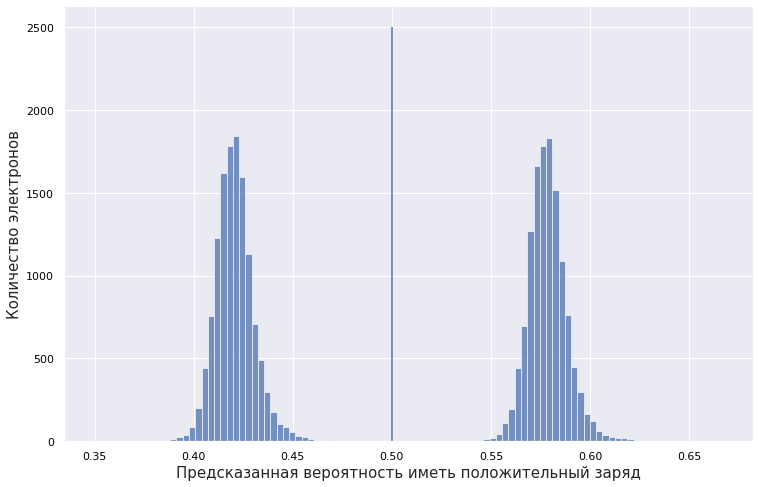

In [78]:
sns.set(rc={'figure.figsize':(11,8)})

sns.histplot(lr_preds_proba, bins=100);
plt.vlines(0.5, 0, 2500);

plt.xlabel('Предсказанная вероятность иметь положительный заряд', fontsize=15);
plt.ylabel('Количество электронов', fontsize=15);
plt.show();

#### Выбор порога классификатора

In [79]:
np.array([1,2,3])

array([1, 2, 3])

In [80]:
def get_confusion_matrix(y_true, y_proba, threshold):
    # сравниваем вероятности с порогом
    y_pred = []
    for i in y_proba:
        if i >= threshold:
            y_pred.append(1)
        else:
            y_pred.append(-1)
    # преобразуем матрицу сопряженности в DataFrame для удобства 
    conf_matrix = pd.DataFrame(confusion_matrix(y_true, np.array(y_pred)))

    return conf_matrix

In [81]:
get_confusion_matrix(y_test, lr_preds_proba, 0.5)

,0,1
0,7467,5375
1,5331,7316


#### Рок-кривая

In [82]:
from sklearn.metrics import roc_curve

In [83]:
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, lr_preds_proba)

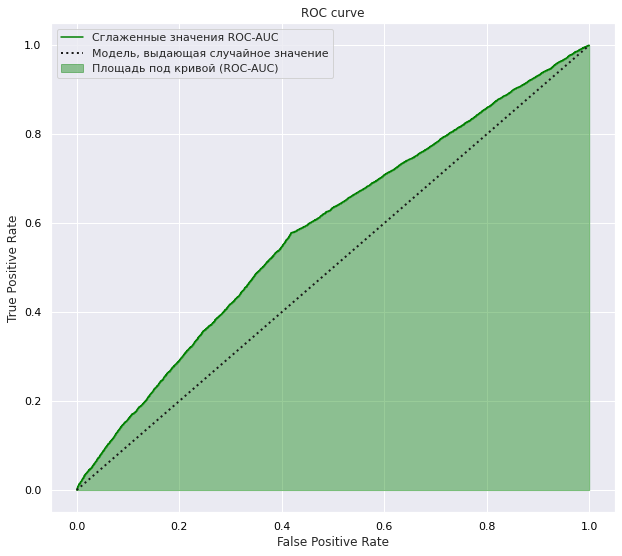

In [84]:
# создаём график
plt.figure(figsize=(9, 9))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC', color = 'green')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="pre", 
                 alpha=0.4, label='Площадь под кривой (ROC-AUC)', color='green')
plt.legend();
plt.show();

### Ближайшие соседи

Для этого метода важен одинаковый маштаб для всех данных(StandartScaling)

In [85]:
y = model['Q2']
X = mean_final_model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [1]:
knn = KNeighborsClassifier(n_neighbors=100, # количество соседей
weights='uniform', # Весовая функция, используемая при прогнозировании
algorithm='auto', # Алгоритм, используемый для вычисления ближайших соседей
leaf_size=50, # Размер листа в BallTree или KDTree
p=2, # Параметр мощности для метрики Минковского
metric='minkowski', # Метрика расстояния, используемая для дерева. Метрика по умолчанию равна
# минковского, а при p=2 эквивалентно стандартной евклидовой метрике
metric_params=None, # dict/ доп.ключевые аргументы для метрической функции
n_jobs=None,
)

NameError: name 'KNeighborsClassifier' is not defined

In [1]:
knn.fit(X_train, y_train)

NameError: name 'knn' is not defined

In [ ]:
knn_preds = knn.predict(X_train)
knn_preds_proba = knn.predict_proba(X_train)[:, 1]

In [ ]:
# Метрика на трейне
print('accuracy', accuracy_score(y_train, knn_preds))
print('roc_auc', roc_auc_score(y_train, knn_preds_proba))
print('f1_score', f1_score(y_train, knn_preds, average = 'weighted'))

In [ ]:
knn_preds = knn.predict(X_test)
knn_preds_proba = knn.predict_proba(X_test)[:, 1]

In [ ]:
# Метрика на тесте
print('accuracy', accuracy_score(y_test, knn_preds))
print('roc_auc', roc_auc_score(y_test, knn_preds_proba))
print('f1_score', f1_score(y_test, knn_preds, average = 'weighted'))

In [ ]:
# Кросс-валидация
cross_val_scores = cross_val_score(knn, X_test, y_train, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))

In [ ]:
# Таблица сопряженности
pd.DataFrame(confusion_matrix(y_test, knn_preds))

In [3]:
tree = DecisionTreeClassifier(
criterion='gini', # Функция для измерения качества разделения {"gini", "entropy"}
splitter='best', # Стратеия, используемая для выбора разделения на каждом узле {"best", "random"}
max_depth=None, # Максимальная глубина дерева. Если не задано, узлы будут увеличиваться до тех пор,
# пока все листья не станут чистыми/объекты в листьях < min_samples_split
min_samples_split=2, # Минимальное количество объектов для разделения внутреннего узла
min_samples_leaf=1, # Минимальное количество объектов, необходимое для нахождения в конечном узле
min_weight_fraction_leaf=0.0, # Минимальная взвешенная доля от общей суммы весов
max_features=None, # Количество функций, которые следует учитывать при поиске наилучшего 
# разделения: int, float, {"auto", "sqrt", "log2"}. 
random_state=42, # Чтобы получить детерминированное поведение
# во время подгонки значение `random_state` должно быть зафиксировано как целое число.
max_leaf_nodes=None, # Вырастите дерево с помощью `max_leaf_nodes` наилучшим образом.
# Если None, то неограниченное количество конечных узлов.
min_impurity_decrease=0.0, # Узел будет разделен, если это разделение приведет к уменьшению 
# ошибки больше или равно значению функции (см. документацию)
class_weight=None, # Веса, связанные с классами в форме {class_label: weight}. 
# Есть 'balanced' - подходит для сбалансированной задачи классификации или указано stratify(train_test_split)
# Если None, все веса = 1
ccp_alpha=0.0 # Параметр сложности, используемый для Minimal Cost-Complexity Pruning
)

# Предобработка тестовых данных и итоговый файл

Далее мы обращаемся к данным, для которых нам необходимо сделать предсказание и применить модель.

In [ ]:
check.info()

In [ ]:
check = check.fillna(1)

Применяем разработанную модель к нашим данным.

In [ ]:
pred = rfc.predict(check)

Сохарняем результат в таком формате, чтобы его затем можно было бы вывести как CSV файл и выгружаем итоговый результат.

In [ ]:
pred = pd.Series(pred)

In [ ]:
pred.head(10)

In [ ]:
pred.to_csv('Result.csv')
pred_file = pd.read_csv('/content/Result.csv')
pred_file.head(10)

In [ ]:
pred_file.rename(columns={'0': 'Q2','Unnamed: 0':'Number'}, inplace=True)

In [ ]:
pred_file.head(10)

Удалим ненужные столбцы.

In [ ]:
check=check.join(pred_file)

In [ ]:
pred_final = check.drop(['Run','E1','px1','py1','pz1','pt1','eta1','phi1','Q1','E2','px2','py2','pz2','pt2','eta2','phi2','M','Number'], axis='columns')

Выполним проверку.

In [ ]:
pred_final.head(10)

In [ ]:
pred_final.to_csv('Result_final.csv',index=False)

Обратите внимание, что ваш код также обязательно будет рассмотрен членами жюри, если вы войдёте в топ-20 участников хакатона приватного лидерборда.